In [1]:
import pandas as pd
import numpy as np
from numpy import absolute
import src.util as utils
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

## Load Configuration File

In [2]:
config = utils.load_config()

## Load Train and Test Set 

In [3]:
def load_train_feng(params: dict):
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_test_feng(params: dict):
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [4]:
x_train, y_train = load_train_feng(config)
x_test, y_test = load_test_feng(config)

## Hyperparameter Tuning and Training Model

In [5]:
regressor = XGBRegressor()
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
search.fit(x_train, y_train)
score = absolute(search.best_score_)

print("The best hyperparameters are", search.best_params_)
print("The best score is", score)

The best hyperparameters are {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}
The best score is 18.549292613698146


In [6]:
best_model = search.best_estimator_
best_param = search.best_params_

## Evaluation

In [7]:
y_hat = best_model.predict(x_test)
errors = mean_absolute_error(y_test, y_hat)
print("MAE: %.3f" % (errors))

MAE: 18.749


In [8]:
dt_pred = {}
dt_pred["true"] = y_test
dt_pred["pred"] = y_hat
dt_pred["true-pred"] = y_test-y_hat
dt_pred = pd.DataFrame.from_dict(dt_pred)
dt_pred

,true,pred,true-pred
8364,518.0,500.925049,17.074951
10328,623.0,619.599243,3.400757
8596,305.5,311.333466,-5.833466
10309,591.0,590.935120,0.064880
4972,984.0,994.890198,-10.890198
...,...,...,...
14011,504.0,491.229370,12.770630
549,597.0,612.286011,-15.286011
8771,594.5,593.425842,1.074158
10031,328.0,330.334045,-2.334045


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21552\2149128753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21552\2149128753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

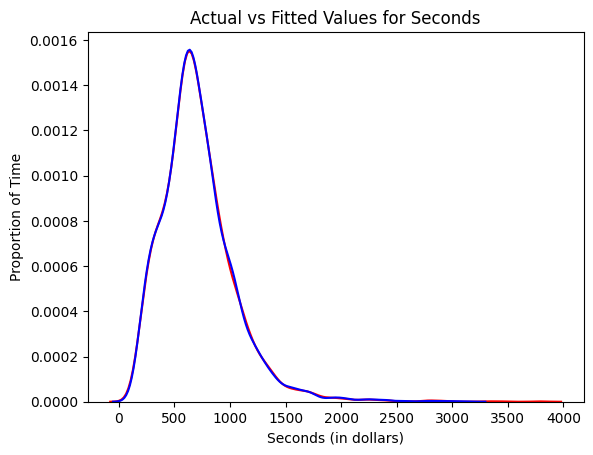

In [9]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Seconds')
plt.xlabel('Seconds (in dollars)')
plt.ylabel('Proportion of Time')

plt.show()
plt.close()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21552\387160787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_pred["true-pred"], hist=False, color="b", label="Fitted Values")


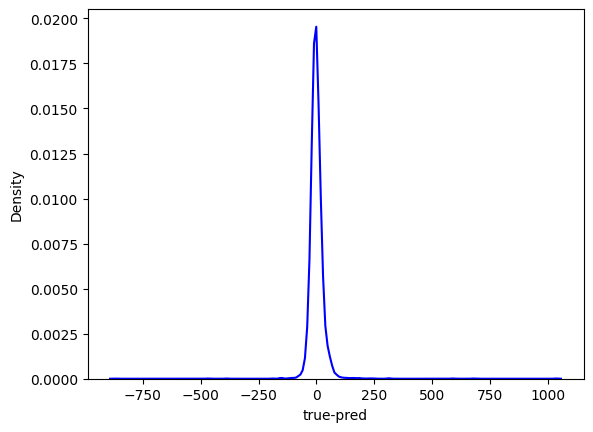

In [10]:
sns.distplot(dt_pred["true-pred"], hist=False, color="b", label="Fitted Values")
plt.show()

In [23]:
utils.pickle_dump(best_model, config["production_model_path"])
utils.pickle_dump(best_param, config["best_parameters"])